# **Titanic Survivors with Decision Trees**

The code below is taken from Manav Sehgal's submission on [kaggle.com](https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook).

You are encouraged to go to the link above and check the full code. In this lab, you will do the necessary steps to explore the data and prepare it for sklearn algorithms.

**About the data set**

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**Import libraries**

In [241]:
# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acquire data

In [242]:
# Acquire the training data set
train_df = pd.read_csv('SupervisedLearning/Titanic_survivors/train.csv')

# Acquire the testing data set 
test_df = pd.read_csv('SupervisedLearning/Titanic_survivors/test.csv')

# Combine these datasets to run certain operations on both datasets together.
combine = [train_df, test_df]

# Inspect data

In [243]:
#TODO: Write code to display the features available in train_df
#Hint: Use columns.values
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [244]:
#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

In the text box below, list all the categorical features.


Name - nominal,
Sex - nominal,
Ticket - ,
Cabin
PassengersId - nominal
Embarked - nominal,
Pclass - Ordinal
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Which features are numerical?** 

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

In the text box below, list all the continuous and discrete features.

****



Continous: Age, Fare. Discrete: SibSp, Parch.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

* Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.



**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

* Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**

Write code below to find the answer.

In [245]:
#TODO: Write code to get the information on train_df  
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [246]:
#TODO: Write code to get the information on test_df 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**answer here:** 
Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.

# Clean data

**1. Correcting**

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped. This will be dropped later, after creating some new features out of it.

In [247]:
# Display the new structure of all data frames before dropping two columns
print("Before", train_df.shape, test_df.shape, combine[0].shape, 
       combine[1].shape)

# Drop Ticket and Cabin columns from train_df
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

#TODO: Write code to drop Ticket and Cabin columns from test_df
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
# Reset the combine data frame with the new values in both datasets
combine = [train_df, test_df]

#TODO: Write code to display the new structure of all data frames after dropping two columns
# Reset the combine data frame
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape



Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [248]:
#TODO: Write code to drop the PassengerId feature in the training dataset.
train_df = train_df.drop(['PassengerId'],axis=1)
# Reset the combine data frame
combine = [train_df, test_df]

#TODO: Write code to display the shape of train_df and test_df
train_df.shape,test_df.shape, combine[0].shape, combine[1].shape

((891, 9), (418, 9), (891, 9), (418, 9))

**2. Creating**

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping the Name feature.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

Most titles band Age groups accurately.
Survival among Title Age bands varies slightly.
Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

We decide to retain the new Title feature for model training.

The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.

In [249]:
# Loop through each item in the combined data set and extract
# titles from the Name column
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [250]:
# Replace titles with a more 
# common name or classify them as Rare.
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    #TODO: Write code to replace the remaining titles with 'Rare'.
    #Note: In the replace function, you can group multiple items using brackets.
    # Example: replace(['Rev','Major'], 'Rare')
    
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [251]:
# Convert the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [252]:
# Safely drop the Name feature from training and testing datasets. 
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

# Recreate the combine data frame with the new values of train_df and test_df
combine = [train_df, test_df]

#TODO: Write code to inspect the new shape of both data frames
train_df.shape,test_df.shape

((891, 9), (418, 9))

**3. Converting**

convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.



In [253]:
# Convert Sex feature to a new feature called Gender where 
# female=1 and male=0.
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**4. Completing**

**4.a.** Complete Age feature for null values, as it is definitely correlated to survival.
* Guess missing values using other correlated features. 
* We note correlation among Age, Gender, and Pclass. 
* Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 
* So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, etc

In [254]:
# Prepare an empty array to contain guessed Age values based on 
# Pclass x Gender combinations.
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [255]:
# Iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed
# values of Age for the six combinations.
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [256]:
# Create Age bands and determine correlations with Survived.
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], 
as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [257]:
# Replace Age with ordinals based on these bands.
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [258]:
# Now it's safe to remove the AgeBand feature from the training data
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**4.b.** Complete the Embarked feature as it may also correlate with survival or another important feature.

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [259]:
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [260]:
# Convert the EmbarkedFill feature by creating a new numeric Port feature.
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


In [261]:
#TODO: Write code to inspect the first five rows of test_df
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,2,1
1,893,3,1,2,1,0,7.0000,0,3
2,894,2,0,3,0,0,9.6875,2,1
3,895,3,0,1,0,0,8.6625,0,1
4,896,3,1,1,1,1,12.2875,0,3


**Creating**

There are more features that can be created to facilitate the analysis of this data set:

* We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
* We may want to engineer the Name feature to extract Title as a new feature.
* We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a Fare range feature if it helps our analysis.


In [262]:
# create a new feature for FamilySize which combines Parch and SibSp. 
# This will enable us to drop Parch and SibSp from our datasets.
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], 
as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [263]:
# Create the IsAlone feature
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [264]:
# Drop Parch, SibSp, and FamilySize features in favor of IsAlone.
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [265]:
# We can also create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [266]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [267]:
# We can not create FareBand.
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [268]:
# Convert the Fare feature to ordinal values based on the FareBand.
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
#TODO: Write code to inspect the first five rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [269]:
#TODO: Write code to inspect the first five rows of test_df
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


# Earn Your Wings

Use a decision tree classifier on the cleaned data set to predict 'Survived' for the given data. Report the accuracy score. Add comments in your code to explain each step that you take in your implementation.

[Text(0.5380747126436781, 0.9583333333333334, 'X[5] <= 1.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2971743295019157, 0.875, 'X[0] <= 1.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]'),
 Text(0.14367816091954022, 0.7916666666666666, 'X[2] <= 2.5\ngini = 0.452\nsamples = 107\nvalue = [70, 37]'),
 Text(0.06513409961685823, 0.7083333333333334, 'X[3] <= 1.0\ngini = 0.483\nsamples = 81\nvalue = [48, 33]'),
 Text(0.05747126436781609, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.07279693486590039, 0.625, 'X[3] <= 2.5\ngini = 0.491\nsamples = 76\nvalue = [43, 33]'),
 Text(0.022988505747126436, 0.5416666666666666, 'X[6] <= 0.5\ngini = 0.49\nsamples = 28\nvalue = [12, 16]'),
 Text(0.01532567049808429, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03065134099616858, 0.4583333333333333, 'X[4] <= 0.5\ngini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(0.01532567049808429, 0.375, 'X[7] <= 1.5\ngini = 0.465\nsamples = 19\nvalue = [7, 12

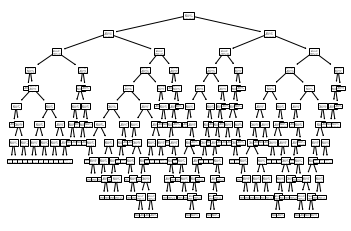

In [270]:
from sklearn import tree

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
#X_test  = test_df.drop("PassengerId", axis=1).copy()
#X_train.shape, Y_train.shape, X_test.shape
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#acc_decision_tree
tree.plot_tree(decision_tree)